In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('creditcard.csv')


In [3]:
# First 5 rows
df.head()

# Data shape (rows, columns)
df.shape

# Column info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df['Class'].value_counts()


Class
0    284315
1       492
Name: count, dtype: int64

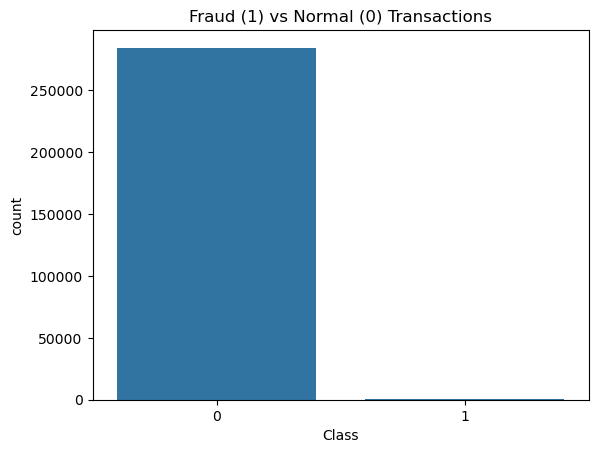

In [5]:
sns.countplot(x='Class', data=df)
plt.title('Fraud (1) vs Normal (0) Transactions')
plt.show()


In [6]:
from sklearn.preprocessing import StandardScaler

# Scale Amount and Time
df['scaled_amount'] = StandardScaler().fit_transform(df[['Amount']])
df['scaled_time'] = StandardScaler().fit_transform(df[['Time']])

# Drop original Amount and Time columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)


In [7]:
# Reorder columns
scaled_df = df[['scaled_time', 'scaled_amount'] + [col for col in df.columns if col not in ['scaled_time', 'scaled_amount', 'Class']] + ['Class']]


In [8]:
X = scaled_df.drop('Class', axis=1)
y = scaled_df['Class']


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [10]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [11]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
sm = SMOTE(random_state=42)

# Fit and resample only on training data
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# Check class balance after SMOTE
from collections import Counter
print("After SMOTE:", Counter(y_resampled))


After SMOTE: Counter({0: 227451, 1: 227451})


In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_resampled, y_resampled)


LogisticRegression()

In [13]:
y_pred = model.predict(X_test)


In [14]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))


Confusion Matrix:
 [[55406  1458]
 [    8    90]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

ROC AUC Score: 0.9463636115673055


In [15]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_resampled, y_resampled)


RandomForestClassifier(random_state=42)

In [16]:
y_pred_rf = rf_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest ROC AUC Score:", roc_auc_score(y_test, y_pred_rf))


Random Forest Confusion Matrix:
 [[56850    14]
 [   17    81]]

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.83      0.84        98

    accuracy                           1.00     56962
   macro avg       0.93      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest ROC AUC Score: 0.9131422053908789


In [17]:
pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 653.6 kB/s eta 0:03:50
   ---------------------------------------- 0.1/150.0 MB 1.2 MB/s eta 0:02:04
   ---------------------------------------- 0.3/150.0 MB 1.8 MB/s eta 0:01:26
   ---------------------------------------- 0.5/150.0 MB 2.5 MB/s eta 0:01:01
   ---------------------------------------- 0.6/150.0 MB 2.5 MB/s eta 0:01:01
   ---------------------------------------- 0.8/150.0 MB 2.9 MB/s eta 0:00:52
   ---------------------------------------- 0.9/150.0 MB 2.8 MB/s eta 0:00:54
   ---------------------------------------- 1.2/150.0 MB 3.3 MB/s eta 0:00:46
   ---------------------------------------- 1.4/150.0 MB 3.4 MB/s eta 0:00:45
   ---------------------------------------- 1.7/150.0 MB 3.6 MB/s eta 0:00:42
    --------------------------------------- 2.0/150.0 MB 3.8 MB/s eta 0:00:4

In [18]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_resampled, y_resampled)

y_pred_xgb = xgb.predict(X_test)

print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nXGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("XGBoost ROC AUC Score:", roc_auc_score(y_test, y_pred_xgb))


C:\Users\lenovo\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:31:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Confusion Matrix:
 [[56831    33]
 [   14    84]]

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.72      0.86      0.78        98

    accuracy                           1.00     56962
   macro avg       0.86      0.93      0.89     56962
weighted avg       1.00      1.00      1.00     56962

XGBoost ROC AUC Score: 0.9282812625612992


In [19]:
pip install joblib


In [20]:
import joblib

# Save the model
joblib.dump(rf_model, 'fraud_detection_model.pkl')


['fraud_detection_model.pkl']

In [21]:
joblib.dump(StandardScaler(), 'scaler.pkl')  # If you want to reuse scaling


['scaler.pkl']

In [24]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.
